In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

In [ ]:
df = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/test.csv')
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [ ]:
df['state'].nunique()

51

In [ ]:
df['state'].unique()

array(['OH', 'NJ', 'OK', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI', 'IA', 'MT',
       'NY', 'ID', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC', 'WY', 'HI', 'NH',
       'AK', 'GA', 'MD', 'AR', 'WI', 'OR', 'MI', 'DE', 'UT', 'CA', 'SD',
       'NC', 'WA', 'MN', 'NM', 'NV', 'DC', 'VT', 'KY', 'ME', 'MS', 'AL',
       'NE', 'KS', 'TN', 'IL', 'PA', 'CT', 'ND'], dtype=object)

In [ ]:
df['area_code'].nunique()

3

In [ ]:
df['area_code'].unique()

array(['area_code_415', 'area_code_408', 'area_code_510'], dtype=object)

In [ ]:
df['area_code'].value_counts()

area_code_415    2108
area_code_408    1086
area_code_510    1056
Name: area_code, dtype: int64

In [ ]:
df['international_plan'].value_counts()

no     3854
yes     396
Name: international_plan, dtype: int64

In [ ]:
df['voice_mail_plan'].value_counts()

no     3138
yes    1112
Name: voice_mail_plan, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in [col for col in df.columns if df[col].dtypes == 'object']:
    df[col] = le.fit_transform(df[col].astype(str))
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,35,107,1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,31,137,1,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,35,84,0,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,36,75,1,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,19,121,2,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0


In [ ]:
for col in [col for col in df_test.columns if df_test[col].dtypes == 'object']:
    df_test[col] = le.fit_transform(df_test[col].astype(str))
df_test.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,16,128,1,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,1,118,2,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,12,62,1,0,0,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,46,93,2,0,0,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,29,174,1,0,0,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [ ]:
X = df.drop('churn', axis = 1)
y = df['churn']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (2975, 19) (2975,)
Test set: (1275, 19) (1275,)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
model = Sequential()
model.add(Dense(units=11, input_shape = (X.shape[1],), activation='relu', kernel_initializer = 'he_normal'))
model.add(Dense(units = 10, activation = 'relu', kernel_initializer = 'he_normal'))
model.add(Dropout(0.3))
model.add(Dense(units = 10, activation = 'relu', kernel_initializer = 'he_normal'))
model.add(Dropout(0.3))
model.add(Dense(units = 1, activation = 'sigmoid'))

In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs = 100, batch_size = 25, verbose = 1, validation_data=(X_test, y_test))

Epoch 1/100
119/119 [==============================] - 2s 5ms/step - loss: 0.5301 - accuracy: 0.8575 - val_loss: 0.4673 - val_accuracy: 0.8549
Epoch 2/100
119/119 [==============================] - 0s 4ms/step - loss: 0.4696 - accuracy: 0.8612 - val_loss: 0.4329 - val_accuracy: 0.8549
Epoch 3/100
119/119 [==============================] - 0s 3ms/step - loss: 0.4432 - accuracy: 0.8612 - val_loss: 0.4142 - val_accuracy: 0.8549
Epoch 4/100
119/119 [==============================] - 0s 4ms/step - loss: 0.4299 - accuracy: 0.8612 - val_loss: 0.4009 - val_accuracy: 0.8549
Epoch 5/100
119/119 [==============================] - 0s 3ms/step - loss: 0.4149 - accuracy: 0.8612 - val_loss: 0.3917 - val_accuracy: 0.8549
Epoch 6/100
119/119 [==============================] - 0s 3ms/step - loss: 0.3939 - accuracy: 0.8612 - val_loss: 0.3817 - val_accuracy: 0.8549
Epoch 7/100
119/119 [==============================] - 0s 3ms/step - loss: 0.3829 - accuracy: 0.8612 - val_loss: 0.3740 - val_accuracy: 0.8549

In [ ]:
loss, acc = model.evaluate(X_test, y_test)
print('Accuracy of model is : %.3f' %acc)

40/40 [==============================] - 0s 2ms/step - loss: 0.2416 - accuracy: 0.9333
Accuracy of model is : 0.933


<Axes: title={'center': 'Accuracy'}>

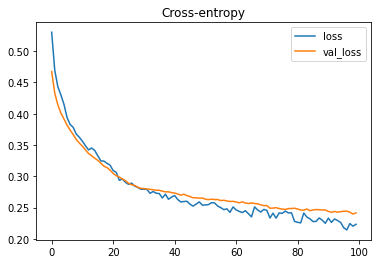

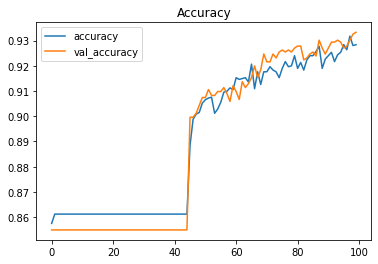

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss','val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy")

In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 11)                220       
                                                                 
 dense_12 (Dense)            (None, 10)                120       
                                                                 
 dropout_7 (Dropout)         (None, 10)                0         
                                                                 
 dense_13 (Dense)            (None, 10)                110       
                                                                 
 dropout_8 (Dropout)         (None, 10)                0         
                                                                 
 dense_14 (Dense)            (None, 1)                 11        
                                                                 
Total params: 461
Trainable params: 461
Non-trainable 